<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/Oil_Forecast_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing the required libraries*

In [184]:
!pip install pmdarima
!pip install quandl
!pip install yfinance

# Importing the required packages

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime,timedelta
import json
import quandl

In [186]:
import urllib.request

file_path = "https://raw.githubusercontent.com/pravin-raut/MachineLearning/Master/dissertation/Config/Config_Git.json"

# Open the file for reading and load the data from it
with urllib.request.urlopen(file_path) as infile:
  data = json.load(infile)
# Set up API key
  api_key=data["nasdaq"]["api_key"]
quandl.ApiConfig.api_key = api_key


# Dates for which data will be extracted

In [187]:
CurrentDate = (datetime.today() - timedelta(days=0)).strftime('%Y-%m-%d')
CurrentDate
FirstDay='2019-01-01'


In [188]:

def getDataFromAPI(API,symbol,start_date,end_date):

  if API=="YFinance":
    # Create a ticker object
    ticker = yf.Ticker(symbol)
    # Download historical data
    data = ticker.history(period="1d", start=start_date, end=end_date)

  if API=="Nasdaq":
    data = quandl.get(symbol,start_date=start_date,end_date=end_date)


  return data

# Get OPEC Oil price data for Nasdaq

In [189]:

df_Oil_InUSD=getDataFromAPI("Nasdaq","OPEC/ORB",FirstDay,CurrentDate).reset_index()
df_Oil_InUSD['Date'] = pd.to_datetime(df_Oil_InUSD['Date']).dt.date
df_Oil_InUSD.set_index('Date', inplace=True)
df_Oil_InUSD

df_Oil_InUSD=df_Oil_InUSD.asfreq('b')
df_Oil_InUSD['Original_Oil_Price']=df_Oil_InUSD.Value.fillna(method='bfill')
df_Oil_InUSD=df_Oil_InUSD[['Original_Oil_Price']]
df_Oil_InUSD

,Original_Oil_Price
Date,
2019-01-02,52.14
2019-01-03,52.93
2019-01-04,55.13
2019-01-07,56.42
2019-01-08,56.09
...,...
2023-07-06,77.56
2023-07-07,78.43
2023-07-10,79.09


In [190]:
df_Oil_InUSD['Original_Oil_Price_MA_5'] = df_Oil_InUSD['Original_Oil_Price'].rolling(window=5,min_periods=1).mean()
df_Oil_InUSD

,Original_Oil_Price,Original_Oil_Price_MA_5
Date,,
2019-01-02,52.14,52.140
2019-01-03,52.93,52.535
2019-01-04,55.13,53.400
2019-01-07,56.42,54.155
2019-01-08,56.09,54.542
...,...,...
2023-07-06,77.56,76.520
2023-07-07,78.43,76.978
2023-07-10,79.09,77.572


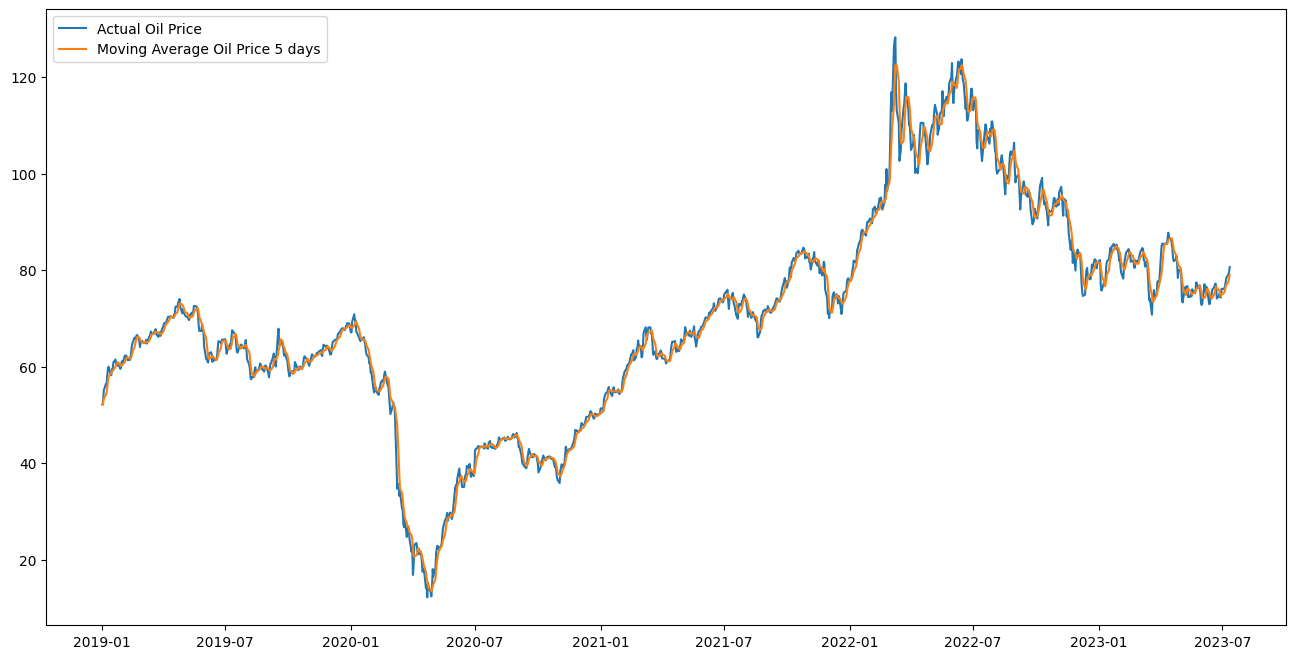

In [191]:
plt.figure(figsize=(16,8))
plt.plot(df_Oil_InUSD['Original_Oil_Price'],label="Actual Oil Price")
plt.plot(df_Oil_InUSD['Original_Oil_Price_MA_5'],label="Moving Average Oil Price 5 days")

plt.legend(loc="upper left")

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_Oil_InUSD[['Original_Oil_Price_MA_5_Scaled']] = scaler.fit_transform(df_Oil_InUSD[['Original_Oil_Price_MA_5']])
df_Oil_InUSD_5_days=df_Oil_InUSD.copy()

In [193]:
def generate_shift_columns(df, column_name, min_shift, max_shift):
    for i in range(min_shift, max_shift + 1):
        df[f'{column_name}_shift{i}'] = df[column_name].shift(i)
    return df


In [194]:
generate_shift_columns(df_Oil_InUSD, 'Original_Oil_Price_MA_5_Scaled', 1, 5)
df_Oil_InUSD.head(10)

,Original_Oil_Price,Original_Oil_Price_MA_5,Original_Oil_Price_MA_5_Scaled,Original_Oil_Price_MA_5_Scaled_shift1,Original_Oil_Price_MA_5_Scaled_shift2,Original_Oil_Price_MA_5_Scaled_shift3,Original_Oil_Price_MA_5_Scaled_shift4,Original_Oil_Price_MA_5_Scaled_shift5
Date,,,,,,,,
2019-01-02,52.14,52.140,-0.811419,NaN,NaN,NaN,NaN,NaN
2019-01-03,52.93,52.535,-0.793454,-0.811419,NaN,NaN,NaN,NaN
2019-01-04,55.13,53.400,-0.754113,-0.793454,-0.811419,NaN,NaN,NaN
2019-01-07,56.42,54.155,-0.719775,-0.754113,-0.793454,-0.811419,NaN,NaN
2019-01-08,56.09,54.542,-0.702174,-0.719775,-0.754113,-0.793454,-0.811419,NaN
2019-01-09,58.22,55.758,-0.646869,-0.702174,-0.719775,-0.754113,-0.793454,-0.811419
2019-01-10,59.46,57.064,-0.587471,-0.646869,-0.702174,-0.719775,-0.754113,-0.793454
2019-01-11,60.00,58.038,-0.543173,-0.587471,-0.646869,-0.702174,-0.719775,-0.754113
2019-01-14,58.39,58.432,-0.525254,-0.543173,-0.587471,-0.646869,-0.702174,-0.719775


In [195]:
df_Oil_InUSD.dropna(inplace=True)
df_Oil_InUSD

,Original_Oil_Price,Original_Oil_Price_MA_5,Original_Oil_Price_MA_5_Scaled,Original_Oil_Price_MA_5_Scaled_shift1,Original_Oil_Price_MA_5_Scaled_shift2,Original_Oil_Price_MA_5_Scaled_shift3,Original_Oil_Price_MA_5_Scaled_shift4,Original_Oil_Price_MA_5_Scaled_shift5
Date,,,,,,,,
2019-01-09,58.22,55.758,-0.646869,-0.702174,-0.719775,-0.754113,-0.793454,-0.811419
2019-01-10,59.46,57.064,-0.587471,-0.646869,-0.702174,-0.719775,-0.754113,-0.793454
2019-01-11,60.00,58.038,-0.543173,-0.587471,-0.646869,-0.702174,-0.719775,-0.754113
2019-01-14,58.39,58.432,-0.525254,-0.543173,-0.587471,-0.646869,-0.702174,-0.719775
2019-01-15,58.24,58.862,-0.505697,-0.525254,-0.543173,-0.587471,-0.646869,-0.702174
...,...,...,...,...,...,...,...,...
2023-07-06,77.56,76.520,0.297403,0.268113,0.247920,0.238551,0.225179,0.206987
2023-07-07,78.43,76.978,0.318233,0.297403,0.268113,0.247920,0.238551,0.225179
2023-07-10,79.09,77.572,0.345249,0.318233,0.297403,0.268113,0.247920,0.238551


# Finding optimal values of p,d,q for ARIMA

## *   **AR term (p)**
This are lags of dependent variables. e.g. predictors for x(t) is x
(t-1) + x(t-2) + x(t-3).

## *   **Differentiation (d)**
This are number of occasions where we apply differentiation.

## *   **MA term (q)**
This are lags for errors in prediction e.g. predictor for x(t) is e(t-1) + e(t-2) + e(t-3), where e(i) is the difference between the moving average value and the actual value.




In [196]:
from statsmodels.tsa.stattools import adfuller

def perform_adfuller(series):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(series)

    # Extract test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]

    # Print the results
    print("Augmented Dickey-Fuller Test:")
    print(f"Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")

    # Check the p-value against a significance level (e.g., 0.05) to determine stationarity
    if p_value <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")



#Check if data is stationary by doing differnce

In [197]:
perform_adfuller(df_Oil_InUSD['Original_Oil_Price_MA_5'].diff(1).dropna())

Augmented Dickey-Fuller Test:
Test Statistic: -6.4539331591529425
P-value: 1.499628139347886e-08
The time series is stationary.


In [198]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt

def plot_acf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_acf(data.dropna(), lags=lags, ax=ax,zero=False)
    plt.title('ACF')
    plt.show()

def plot_pacf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_pacf(data.dropna(), lags=lags, ax=ax,zero=False,alpha=0.05)
    plt.title('PACF')
    plt.show()


# Verifying the lags which can be selected for Training the model
## The lag value where the chart crosses the confidence interval for the first time can be good starting to point to select values of P(ACF) and Q(PACF)

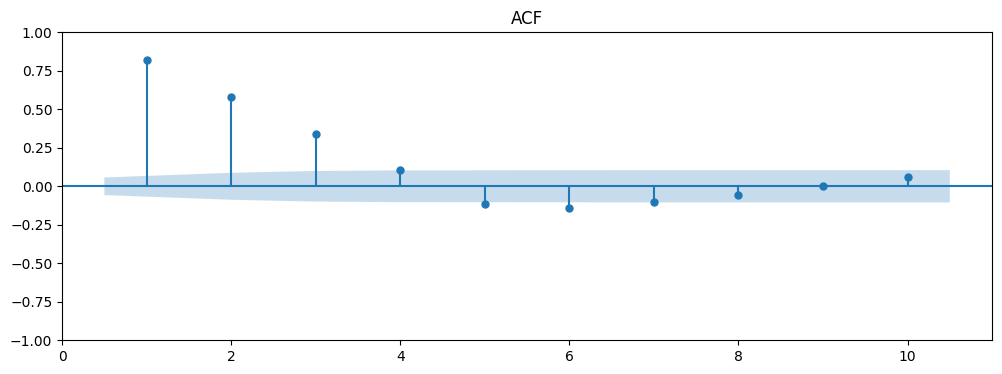

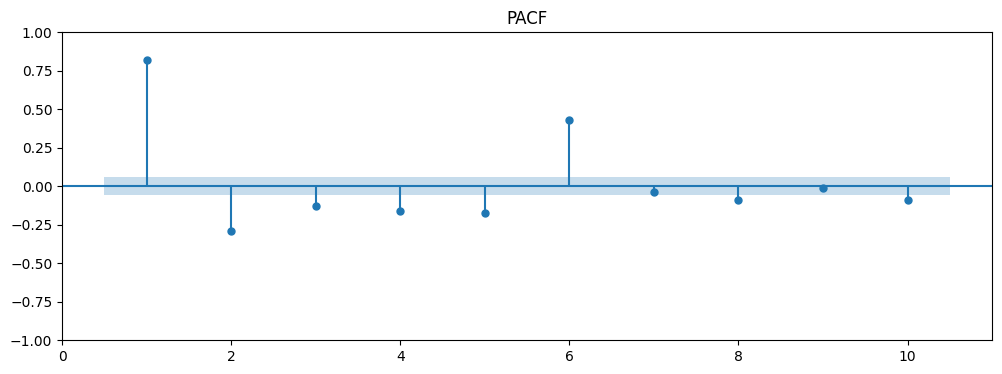

In [199]:
plot_acf_values(df_Oil_InUSD['Original_Oil_Price_MA_5'].diff(1).dropna(),10)
plot_pacf_values(df_Oil_InUSD['Original_Oil_Price_MA_5'].diff(1).dropna(),10)

# Defining Training and Testing timeline

In [200]:
# Define the start and end dates for train and test data
train_start_date = pd.to_datetime(FirstDay)
train_end_date = pd.to_datetime('2022-12-31')
test_start_date = pd.to_datetime('2023-01-01')


In [201]:
train_data_oil = df_Oil_InUSD[(df_Oil_InUSD.index >= train_start_date) & (df_Oil_InUSD.index <= train_end_date)]
test_data_oil = df_Oil_InUSD[df_Oil_InUSD.index >= test_start_date]
train_data_oil.head(5)



,Original_Oil_Price,Original_Oil_Price_MA_5,Original_Oil_Price_MA_5_Scaled,Original_Oil_Price_MA_5_Scaled_shift1,Original_Oil_Price_MA_5_Scaled_shift2,Original_Oil_Price_MA_5_Scaled_shift3,Original_Oil_Price_MA_5_Scaled_shift4,Original_Oil_Price_MA_5_Scaled_shift5
Date,,,,,,,,
2019-01-09,58.22,55.758,-0.646869,-0.702174,-0.719775,-0.754113,-0.793454,-0.811419
2019-01-10,59.46,57.064,-0.587471,-0.646869,-0.702174,-0.719775,-0.754113,-0.793454
2019-01-11,60.00,58.038,-0.543173,-0.587471,-0.646869,-0.702174,-0.719775,-0.754113
2019-01-14,58.39,58.432,-0.525254,-0.543173,-0.587471,-0.646869,-0.702174,-0.719775
2019-01-15,58.24,58.862,-0.505697,-0.525254,-0.543173,-0.587471,-0.646869,-0.702174


In [202]:
df=train_data_oil

# Auto Arima to find values of p,d,q

In [203]:
from pmdarima import auto_arima
model = auto_arima(train_data_oil['Original_Oil_Price_MA_5'].dropna(),
                         seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False)
model.summary()


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2495.010, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1750.592, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1244.203, Time=1.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1237.080, Time=3.16 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=5.32 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=8.88 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1313.654, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1238.806, Time=0.89 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1225.412, Time=1.77 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.57 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=9.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1212.769, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1183.295, Time=1.60 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1182.901, Time=3.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1038
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -500.819
Date:                Fri, 14 Jul 2023   AIC                           1015.637
Time:                        11:37:01   BIC                           1050.246
Sample:                    01-09-2019   HQIC                          1028.768
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0187      0.044      0.427      0.669      -0.067       0.104
ar.L1         -0.3511      0.019    -18.217      0.000      -0.389      -0.313
ar.L2          0.3973      0.020     20.131      0.000       0.359       0.436
ar.L3          0.3208      0.019     16.679      0.000       0.283       0.359
ma.L1          1.5807      0.006    280.880      0.000       1.570       1.592
ma.L2          0.9710      0.006    150.444      0.000       0.958       0.984
sigma2         0.1530      0.003     47.222      0.000       0.147       0.159
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):              4225.02
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [204]:
import warnings
warnings.filterwarnings("ignore")


#After verifying manually diffrent values , along with what was observed from plot_acf and plot_pacf decided values of p,d,q

In [205]:
exogdata=['Original_Oil_Price_MA_5_Scaled_shift1','Original_Oil_Price_MA_5_Scaled_shift2','Original_Oil_Price_MA_5_Scaled_shift3','Original_Oil_Price_MA_5_Scaled_shift4','Original_Oil_Price_MA_5_Scaled_shift5']

In [206]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

oil_model=SARIMAX(train_data_oil['Original_Oil_Price_MA_5_Scaled'],order=(5,1,5),exog=train_data_oil[exogdata])
oil_model_fit=oil_model.fit(maxiter=1000)
oil_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     Original_Oil_Price_MA_5_Scaled   No. Observations:                 1038
Model:                           SARIMAX(5, 1, 5)   Log Likelihood                2880.822
Date:                            Fri, 14 Jul 2023   AIC                          -5729.643
Time:                                    11:38:04   BIC                          -5650.538
Sample:                                01-09-2019   HQIC                         -5699.631
                                     - 12-30-2022                                         
Covariance Type:                              opg                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Original_Oil_Price_MA_5_Scaled_shift1     0.8495      0.169      5.033      0.000       0.519       1.180
Original_Oil_Price_MA_5_Scaled_shift2     0.7756      0.107      7.253      0.000       0.566       0.985
Original_Oil_Price_MA_5_Scaled_shift3    -0.5931      0.129     -4.613      0.000      -0.845      -0.341
Original_Oil_Price_MA_5_Scaled_shift4    -0.3338      0.062     -5.383      0.000      -0.455      -0.212
Original_Oil_Price_MA_5_Scaled_shift5     0.2998      0.048      6.217      0.000       0.205       0.394
ar.L1                                     0.3108      0.171      1.813      0.070      -0.025       0.647
ar.L2                                    -0.7104      0.085     -8.314      0.000      -0.878      -0.543
ar.L3                                     0.2321      0.196      1.183      0.237      -0.152       0.617
ar.L4                                    -0.1557      0.071     -2.207      0.027      -0.294      -0.017
ar.L5                                     0.0264      0.087      0.304      0.761      -0.144       0.197
ma.L1                                    -0.0325      0.041     -0.799      0.424      -0.112       0.047
ma.L2                                     0.0179      0.049      0.368      0.713      -0.077       0.113
ma.L3                                    -0.0043      0.048     -0.089      0.929      -0.099       0.090
ma.L4                                    -0.0025      0.040     -0.062      0.951      -0.081       0.076
ma.L5                                    -0.9770      0.051    -18.988      0.000      -1.078      -0.876
sigma2                                    0.0002   1.18e-05     18.853      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4517.80
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.52   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Things to verifiy in optimal model selection
### 1) Log Likelihood ==> Higher the log value better the model is performing.
### 2) AIC , BIC, HQIC --> This are information criteria whcih states lower the criteria better is the model.

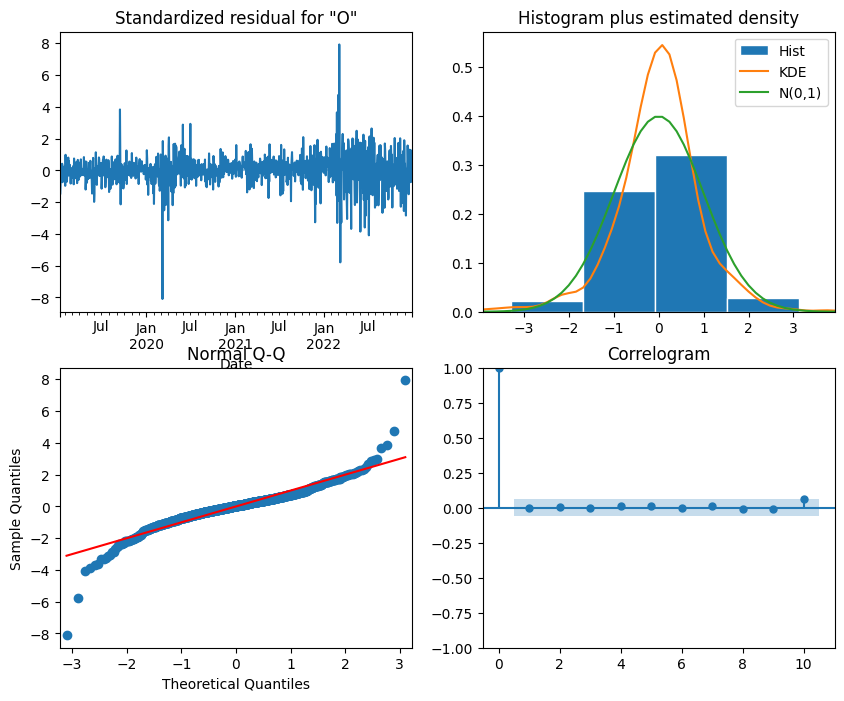

In [207]:
oil_model_fit.plot_diagnostics(figsize=(10,8))
plt.show()


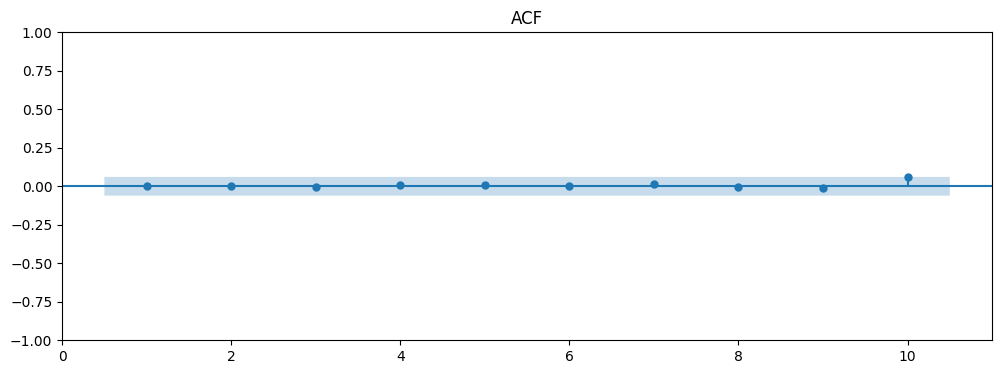

In [208]:
resid=oil_model_fit.resid
plot_acf_values(resid,10)

### **1. Standardized Residulal** : This residual doesnt show any pattern and are randomly distributed around zero.
### **2. Histogram Plust esitmeted density** : Residuals are normally distriuted
### **3. Normal Q-Q Plot** : Most of the are along red line
### **4. Correlogram** : Its and ACF plot of residuals at diffrent lag and their is no autocorrelation seen

In [209]:
testing_data_forecast = oil_model_fit.get_forecast(steps=len(test_data_oil), alpha=0.05,exog=test_data_oil[exogdata])


# Create a new dataframe to hold the forecast
test_data_oil[['lower Cur predictions','Higher Cur predictions']] = testing_data_forecast.conf_int()

# Create a new column for the forecasted values
test_data_oil['Cur predictions'] =  testing_data_forecast.predicted_mean


test_data_oil[['Original_Oil_Price_Predicted']] = scaler.inverse_transform(test_data_oil[['Cur predictions']])
test_data_oil

,Original_Oil_Price,Original_Oil_Price_MA_5,Original_Oil_Price_MA_5_Scaled,Original_Oil_Price_MA_5_Scaled_shift1,Original_Oil_Price_MA_5_Scaled_shift2,Original_Oil_Price_MA_5_Scaled_shift3,Original_Oil_Price_MA_5_Scaled_shift4,Original_Oil_Price_MA_5_Scaled_shift5,lower Cur predictions,Higher Cur predictions,Cur predictions,Original_Oil_Price_Predicted
Date,,,,,,,,,,,,
2023-01-02,82.05,81.584,0.527718,0.529355,0.522897,0.529719,0.506069,0.468775,0.490133,0.548548,0.519341,81.399810
2023-01-03,82.05,81.548,0.526080,0.527718,0.529355,0.522897,0.529719,0.506069,0.470992,0.565851,0.518422,81.379610
2023-01-04,76.88,80.532,0.479872,0.526080,0.527718,0.529355,0.522897,0.529719,0.470389,0.573077,0.521733,81.452407
2023-01-05,75.77,79.608,0.437848,0.479872,0.526080,0.527718,0.529355,0.522897,0.439976,0.546958,0.493467,80.830929
2023-01-06,76.15,78.580,0.391093,0.437848,0.479872,0.526080,0.527718,0.529355,0.361966,0.478769,0.420368,79.223666
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06,77.56,76.520,0.297403,0.268113,0.247920,0.238551,0.225179,0.206987,0.204956,0.327726,0.266341,75.837022
2023-07-07,78.43,76.978,0.318233,0.297403,0.268113,0.247920,0.238551,0.225179,0.240935,0.363705,0.302320,76.628117
2023-07-10,79.09,77.572,0.345249,0.318233,0.297403,0.268113,0.247920,0.238551,0.270255,0.393025,0.331640,77.272772


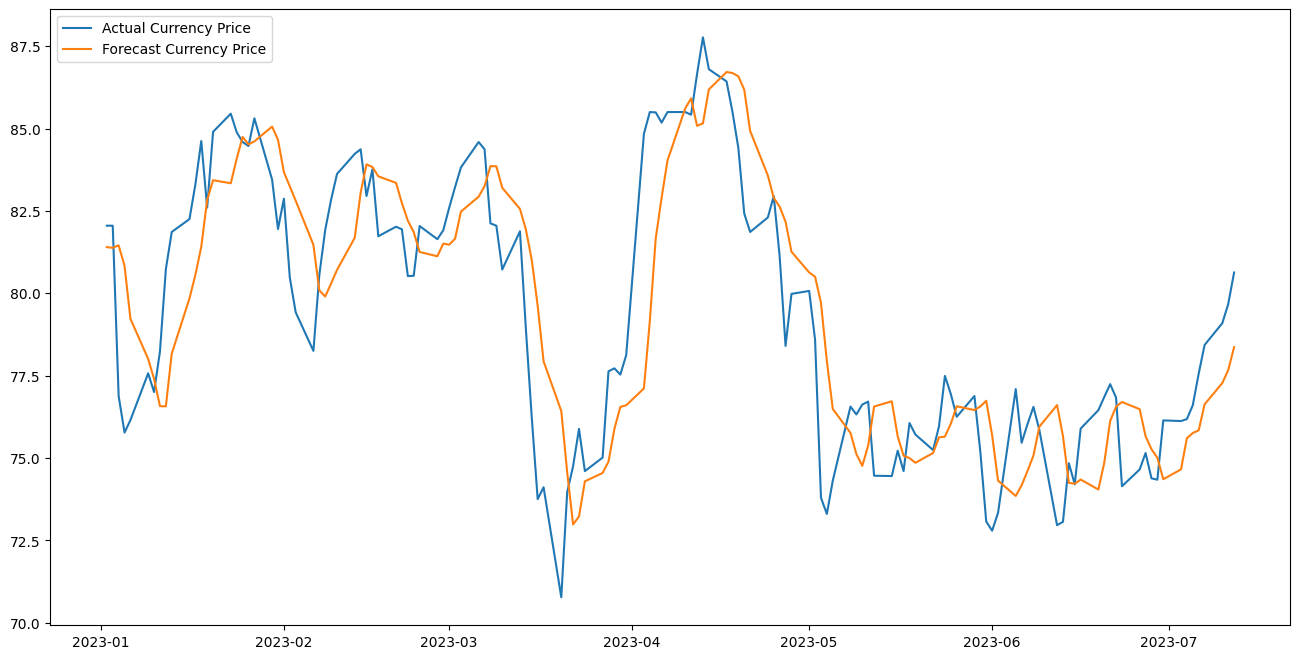

In [210]:
plt.figure(figsize=(16,8))
plt.plot(test_data_oil['Original_Oil_Price'],label="Actual Currency Price")
plt.plot(test_data_oil['Original_Oil_Price_Predicted'],label="Forecast Currency Price")
plt.legend(loc="upper left")
plt.show()


In [211]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Mean Absolute Error": mae, "Mean Squared Error": mse, "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}




# Calcualate metrics of model for One Day Forecasting

In [212]:


metrics = calculate_metrics(test_data_oil['Original_Oil_Price'], test_data_oil['Original_Oil_Price_Predicted'])
metrics

{'Mean Absolute Error': 1.8269753026129576,
 'Mean Squared Error': 5.3958459012712945,
 'Root Mean Squared Error': 2.322896016026394,
 'Mean Absolute Percentage Error': 2.3190464845130867}

# Five Day Steap Ahead -Walk-Forward Validation



In [213]:
df_Oil_InUSD_5_days

,Original_Oil_Price,Original_Oil_Price_MA_5,Original_Oil_Price_MA_5_Scaled
Date,,,
2019-01-02,52.14,52.140,-0.811419
2019-01-03,52.93,52.535,-0.793454
2019-01-04,55.13,53.400,-0.754113
2019-01-07,56.42,54.155,-0.719775
2019-01-08,56.09,54.542,-0.702174
...,...,...,...
2023-07-06,77.56,76.520,0.297403
2023-07-07,78.43,76.978,0.318233
2023-07-10,79.09,77.572,0.345249


In [214]:
generate_shift_columns(df_Oil_InUSD_5_days, 'Original_Oil_Price_MA_5_Scaled', 6, 7)
df_Oil_InUSD_5_days

,Original_Oil_Price,Original_Oil_Price_MA_5,Original_Oil_Price_MA_5_Scaled,Original_Oil_Price_MA_5_Scaled_shift6,Original_Oil_Price_MA_5_Scaled_shift7
Date,,,,,
2019-01-02,52.14,52.140,-0.811419,NaN,NaN
2019-01-03,52.93,52.535,-0.793454,NaN,NaN
2019-01-04,55.13,53.400,-0.754113,NaN,NaN
2019-01-07,56.42,54.155,-0.719775,NaN,NaN
2019-01-08,56.09,54.542,-0.702174,NaN,NaN
...,...,...,...,...,...
2023-07-06,77.56,76.520,0.297403,0.229637,0.255652
2023-07-07,78.43,76.978,0.318233,0.206987,0.229637
2023-07-10,79.09,77.572,0.345249,0.225179,0.206987


In [215]:
df_Oil_InUSD_5_days.dropna(inplace=True)
df_Oil_InUSD_5_days

,Original_Oil_Price,Original_Oil_Price_MA_5,Original_Oil_Price_MA_5_Scaled,Original_Oil_Price_MA_5_Scaled_shift6,Original_Oil_Price_MA_5_Scaled_shift7
Date,,,,,
2019-01-11,60.00,58.038,-0.543173,-0.793454,-0.811419
2019-01-14,58.39,58.432,-0.525254,-0.754113,-0.793454
2019-01-15,58.24,58.862,-0.505697,-0.719775,-0.754113
2019-01-16,59.52,59.122,-0.493872,-0.702174,-0.719775
2019-01-17,59.63,59.156,-0.492325,-0.646869,-0.702174
...,...,...,...,...,...
2023-07-06,77.56,76.520,0.297403,0.229637,0.255652
2023-07-07,78.43,76.978,0.318233,0.206987,0.229637
2023-07-10,79.09,77.572,0.345249,0.225179,0.206987


In [216]:

train_data_oil = df_Oil_InUSD_5_days[(df_Oil_InUSD_5_days.index >= train_start_date) & (df_Oil_InUSD_5_days.index <= train_end_date)]
test_data_oil = df_Oil_InUSD_5_days[df_Oil_InUSD_5_days.index >= test_start_date]
train_data_oil.head(5)


,Original_Oil_Price,Original_Oil_Price_MA_5,Original_Oil_Price_MA_5_Scaled,Original_Oil_Price_MA_5_Scaled_shift6,Original_Oil_Price_MA_5_Scaled_shift7
Date,,,,,
2019-01-11,60.00,58.038,-0.543173,-0.793454,-0.811419
2019-01-14,58.39,58.432,-0.525254,-0.754113,-0.793454
2019-01-15,58.24,58.862,-0.505697,-0.719775,-0.754113
2019-01-16,59.52,59.122,-0.493872,-0.702174,-0.719775
2019-01-17,59.63,59.156,-0.492325,-0.646869,-0.702174


In [217]:
exogdata=['Original_Oil_Price_MA_5_Scaled_shift6','Original_Oil_Price_MA_5_Scaled_shift7']


In [218]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

oil_model=SARIMAX(train_data_oil['Original_Oil_Price_MA_5_Scaled'],order=(5,1,3),exog=train_data_oil[exogdata])
oil_model_fit=oil_model.fit(maxiter=1000)
oil_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     Original_Oil_Price_MA_5_Scaled   No. Observations:                 1036
Model:                           SARIMAX(5, 1, 3)   Log Likelihood                2802.865
Date:                            Fri, 14 Jul 2023   AIC                          -5583.730
Time:                                    11:38:44   BIC                          -5529.366
Sample:                                01-11-2019   HQIC                         -5563.102
                                     - 12-30-2022                                         
Covariance Type:                              opg                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Original_Oil_Price_MA_5_Scaled_shift6     0.2878      0.030      9.725      0.000       0.230       0.346
Original_Oil_Price_MA_5_Scaled_shift7     0.1950      0.030      6.552      0.000       0.137       0.253
ar.L1                                     0.8764      0.058     15.029      0.000       0.762       0.991
ar.L2                                    -0.3723      0.090     -4.148      0.000      -0.548      -0.196
ar.L3                                    -0.1975      0.086     -2.291      0.022      -0.366      -0.029
ar.L4                                     0.5066      0.059      8.547      0.000       0.390       0.623
ar.L5                                    -0.5438      0.030    -18.291      0.000      -0.602      -0.486
ma.L1                                     0.0919      0.056      1.649      0.099      -0.017       0.201
ma.L2                                     0.5523      0.036     15.353      0.000       0.482       0.623
ma.L3                                     0.7125      0.056     12.789      0.000       0.603       0.822
sigma2                                    0.0003   5.03e-06     51.092      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):              5355.81
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               2.67   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

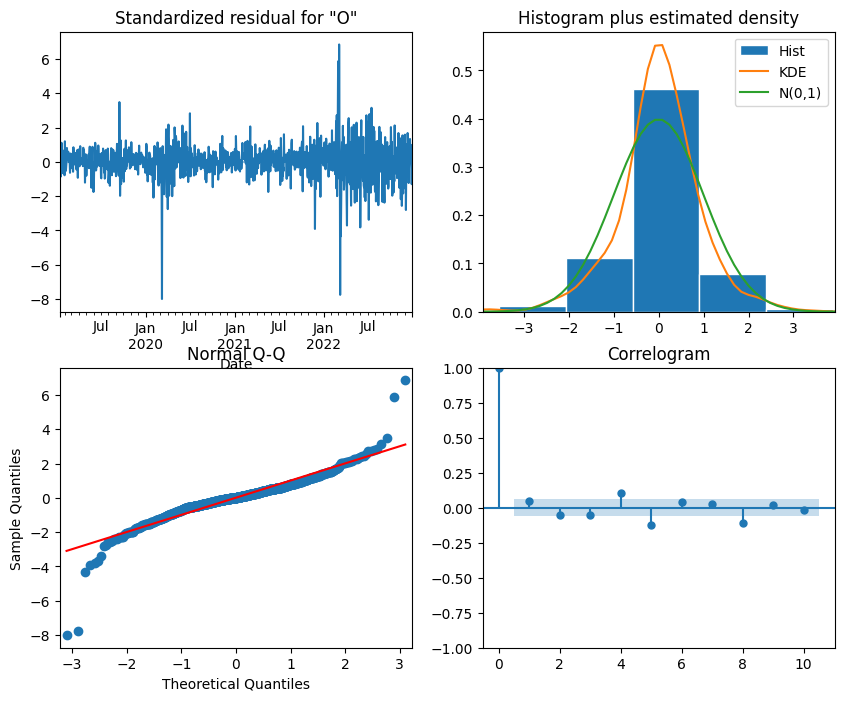

In [219]:
oil_model_fit.plot_diagnostics(figsize=(10,8))
plt.show()


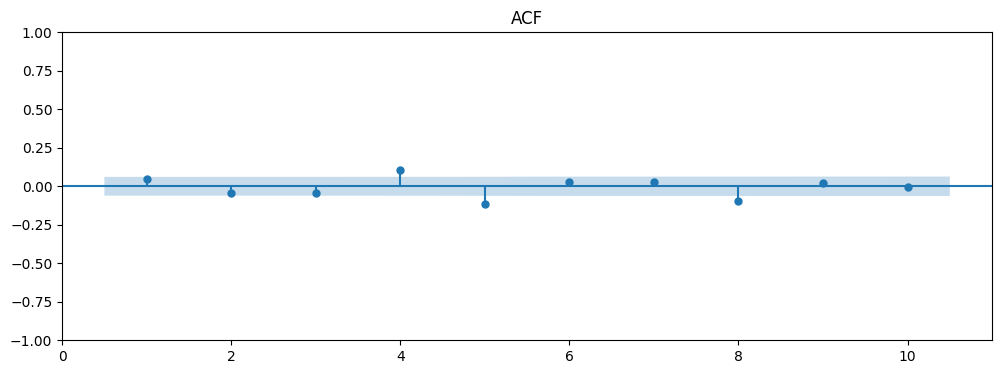

In [220]:
resid=oil_model_fit.resid
plot_acf_values(resid,10)

In [221]:
testing_data_forecast = oil_model_fit.get_forecast(steps=len(test_data_oil), alpha=0.05,exog=test_data_oil[exogdata])


# Create a new dataframe to hold the forecast
test_data_oil[['lower Cur predictions','Higher Cur predictions']] = testing_data_forecast.conf_int()

# Create a new column for the forecasted values
test_data_oil['Cur predictions'] =  testing_data_forecast.predicted_mean


test_data_oil[['Original_Oil_Price_Predicted']] = scaler.inverse_transform(test_data_oil[['Cur predictions']])
test_data_oil

,Original_Oil_Price,Original_Oil_Price_MA_5,Original_Oil_Price_MA_5_Scaled,Original_Oil_Price_MA_5_Scaled_shift6,Original_Oil_Price_MA_5_Scaled_shift7,lower Cur predictions,Higher Cur predictions,Cur predictions,Original_Oil_Price_Predicted
Date,,,,,,,,,
2023-01-02,82.05,81.584,0.527718,0.431298,0.414470,0.500025,0.562888,0.531456,81.666199
2023-01-03,82.05,81.548,0.526080,0.468775,0.431298,0.459812,0.598602,0.529207,81.616755
2023-01-04,76.88,80.532,0.479872,0.506069,0.468775,0.410950,0.644941,0.527946,81.589012
2023-01-05,75.77,79.608,0.437848,0.529719,0.506069,0.364581,0.710477,0.537529,81.799730
2023-01-06,76.15,78.580,0.391093,0.522897,0.529719,0.309717,0.773299,0.541508,81.887214
...,...,...,...,...,...,...,...,...,...
2023-07-06,77.56,76.520,0.297403,0.229637,0.255652,-0.765208,1.600884,0.417838,79.168041
2023-07-07,78.43,76.978,0.318233,0.206987,0.229637,-0.781135,1.593627,0.406246,78.913161
2023-07-10,79.09,77.572,0.345249,0.225179,0.206987,-0.784635,1.598766,0.407065,78.931183


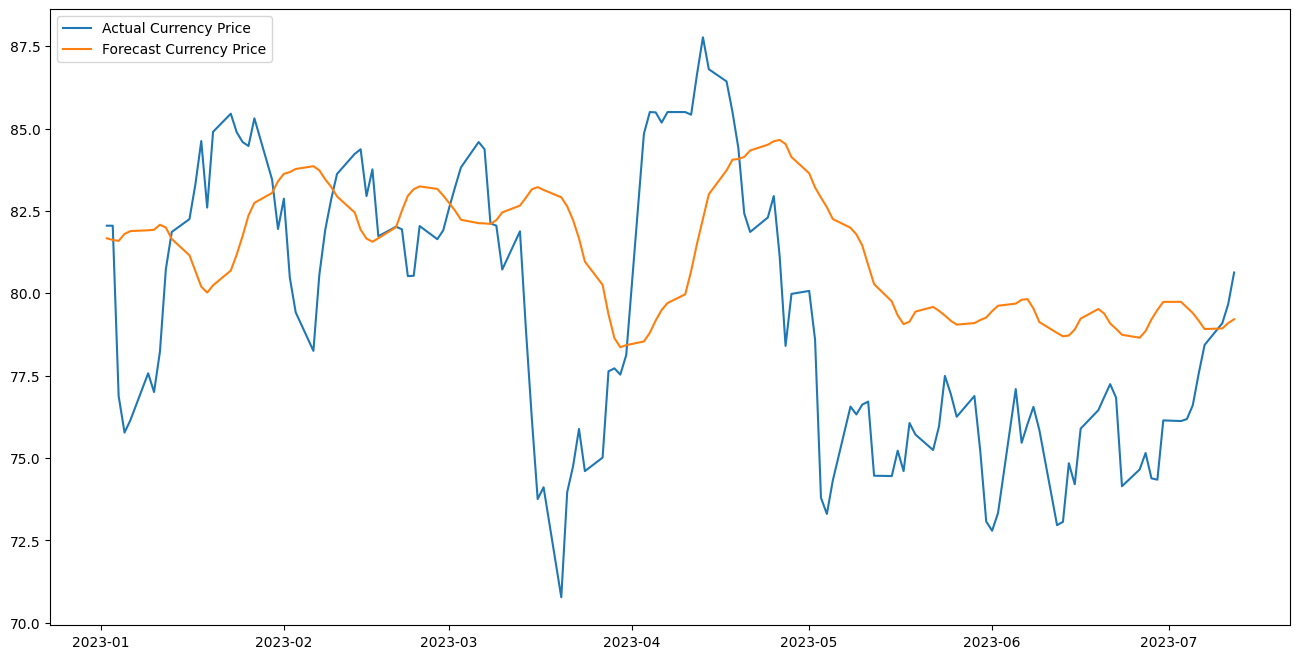

In [222]:
plt.figure(figsize=(16,8))
plt.plot(test_data_oil['Original_Oil_Price'],label="Actual Currency Price")
plt.plot(test_data_oil['Original_Oil_Price_Predicted'],label="Forecast Currency Price")
plt.legend(loc="upper left")
plt.show()


In [223]:


metrics = calculate_metrics(test_data_oil['Original_Oil_Price'], test_data_oil['Original_Oil_Price_Predicted'])
metrics

{'Mean Absolute Error': 3.503643772176349,
 'Mean Squared Error': 17.732177101544647,
 'Root Mean Squared Error': 4.2109591664542,
 'Mean Absolute Percentage Error': 4.5045490038272}